In [3]:
#importing libraries
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")



In [4]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final.csv


In [5]:
df= pd.read_csv("final.csv")

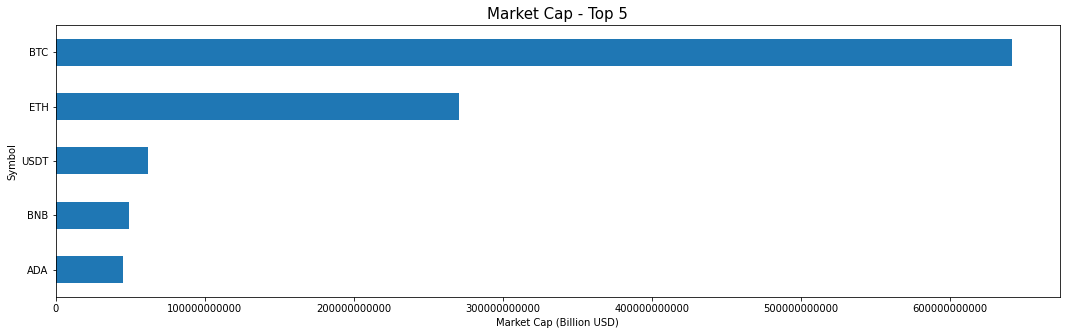

In [18]:
plt.figure(figsize=(18,5))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (Billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Market Cap - Top 5", fontsize=15)
plt.show()

In [19]:
dx=df.copy()

top_4_currency_names = dx.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index

top_4_currency_names_except_first=dx[dx['Symbol']!='BTC'].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index

top_4_currency_names_except_first_two=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index
top_4_currency_names_except_first_two_three=dx[(dx['Symbol']!='BTC') & (dx['Symbol']!='ETH')& (dx['Symbol']!='USDT')].groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(4).index


data_top_4_currencies = dx[dx['Symbol'].isin(top_4_currency_names)]

top_4_currencies_after_BTC = dx[dx['Symbol'].isin(top_4_currency_names_except_first)]

top_4_currencies_after_BTC_ETH = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two)]

top_4_currencies_after_BTC_ETH_USDT = dx[dx['Symbol'].isin(top_4_currency_names_except_first_two_three)]

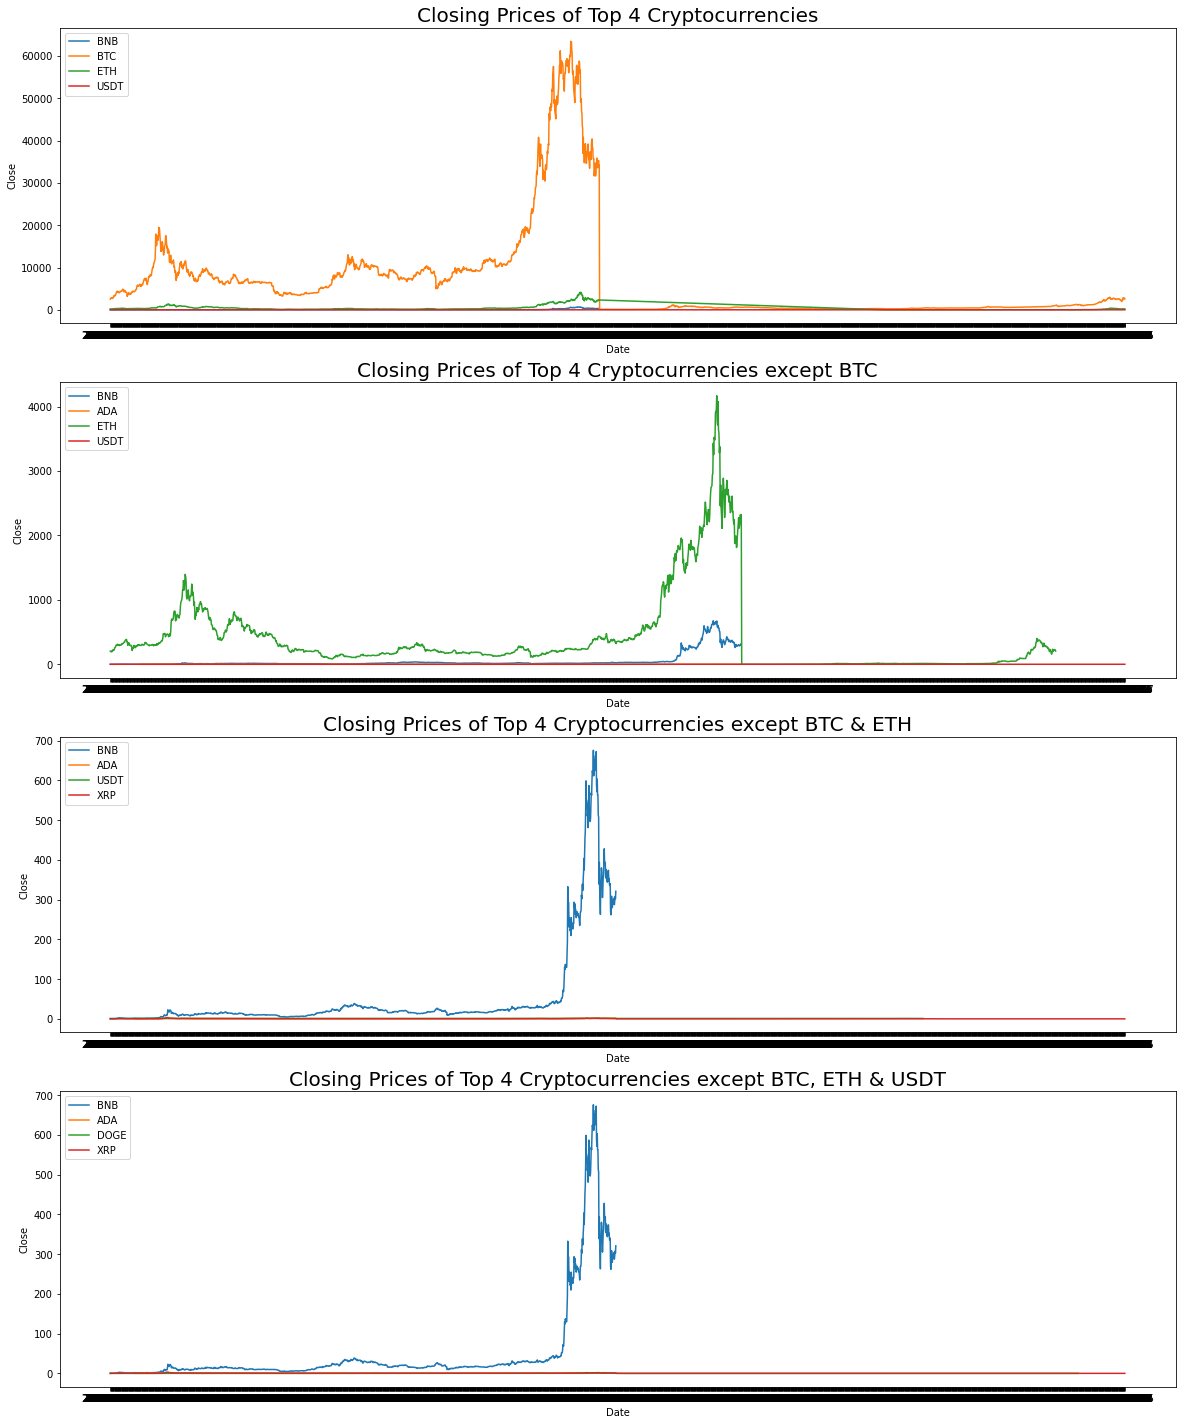

In [8]:
plt.figure(figsize=(20,25))

plt.subplot(4,1,1)
sns.lineplot(data=data_top_4_currencies, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,2)
sns.lineplot(data=top_4_currencies_after_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,3)
sns.lineplot(data=top_4_currencies_after_BTC_ETH,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC & ETH", fontsize=20)
plt.legend(loc='upper left')

plt.subplot(4,1,4)
sns.lineplot(data=top_4_currencies_after_BTC_ETH_USDT,x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Top 4 Cryptocurrencies except BTC, ETH & USDT", fontsize=20)
plt.legend(loc='upper left')

plt.show()


In [9]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    options=[i]
    rslt_df = df[df['Symbol'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

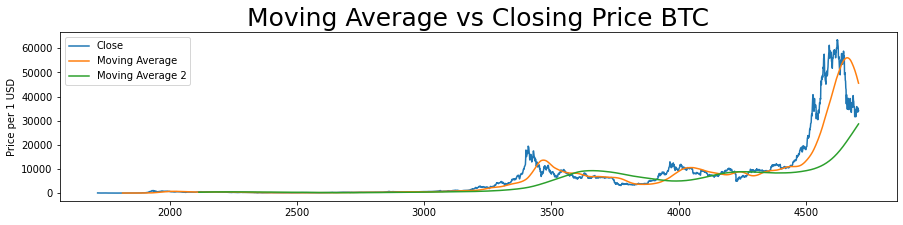

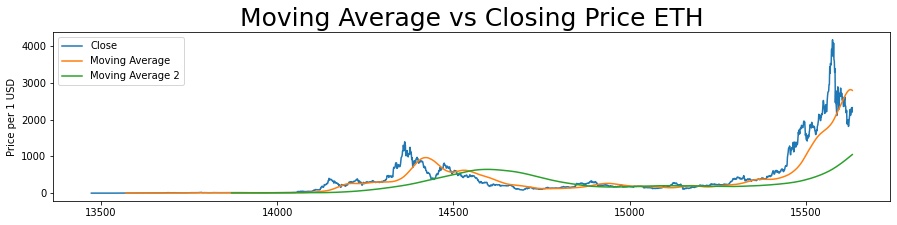

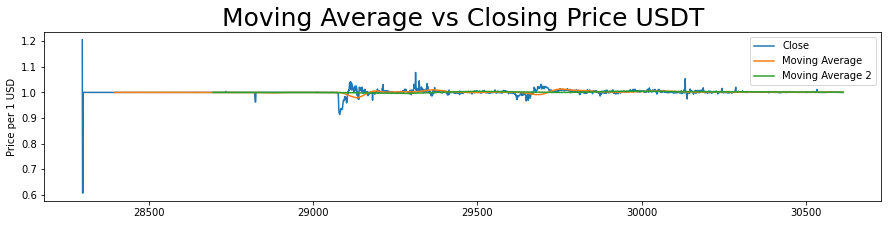

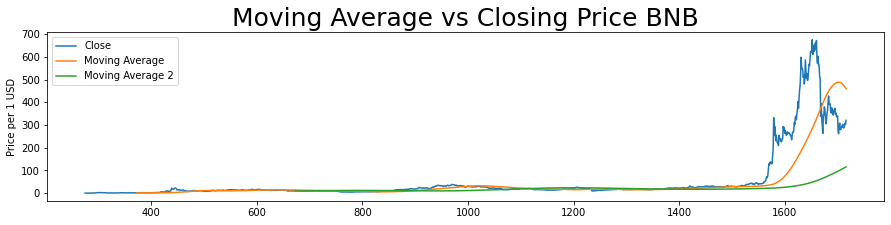

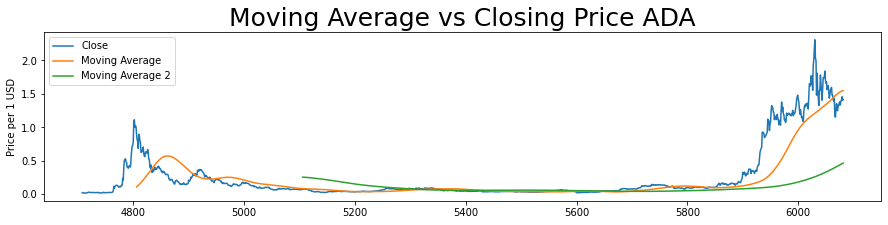

In [10]:
for i in ['BTC','ETH','USDT','BNB','ADA']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

moving avg - per 19 day 
moving avg2 - per 200 day 

USDt and ada and bnb they're not worthy becuse they are very volatile 

But BTC ETH are stable because they showed 2 golden and cross and 2 death cross, after death cross the market got bulish 

In [11]:
import plotly.express as px

In [12]:
area = px.area(data_frame= df , x = "Date" ,y= "High", line_group="Name" , color = "Name" , color_discrete_sequence=px.colors.qualitative.Alphabet_r,title = 'Area Plot for TOP Cryptocurrencies')

area.update_xaxes(
    title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
area.update_layout(showlegend = True,title = {'text': 'Area Plot for TOP Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center',
                                              'yanchor': 'top'})

area.show()

Plotly is used for area graph and making the graph interactive.

In [13]:
area = px.area(data_frame = df,y  = "Marketcap" , x = "Date" , line_group="Name", color = "Name",color_discrete_sequence=px.colors.qualitative.Alphabet, title = 'Market Cap Change of all Cryptocurrencies')

area.update_xaxes(title_text = 'Date',rangeslider_visible = True,rangeselector = dict(buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')])))

area.update_yaxes(title_text = 'Percentage Change ', ticksuffix = '%')
area.update_layout(showlegend = True,title = {'text': 'MarKet Cap Change of all Cryptocurrencies','y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})

area.show()

Conclusion for the performed EDA:
Bitcoin is the highest value according to market cap and etherum is 50% of it and all other are very less in comperision to it and USDT is 3 times less then the Etherum

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.

It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .

Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.
